# Evaluación 3 Inteligencia Artificial Aplicada
---

La información contenida en el siguiente informe fue retirada de [Bitcoin Price (USD)](https://www.kaggle.com/datasets/aakashverma8900/bitcoin-price-usd), En este sitio se puede descargar el csv utilizado para predecir los datos seleccionados.

## Descripción del conjunto de datos
El conjunto de datos analizados corresponde a un `dataset` el cual contiene información relacionada con los precios de bitcoin desde el 1 de enero de 2020, hasta el 12 de mayo de 2021, los datos son entregados en un intervalo de 1 minuto corresponden a velas japonesas, y por ende, los datos almacenados de estos son los siguientes:
1. Abertura.
2. Cierre.
3. Máximo.
4. Mínimo.
5. Volumen de activos cotizados.
6. Número de trades.
7. Volumen de activos de base de compra.
8. Volumen de activos.

Estos datos serán utilizados con los siguientes objetivos:
1. Predicción de precios para deducir los precios consiguientes.
2. Echar un vistazo a los precios reales entregado en los datos.
3. Entregar un MAE y RMSE basándonos en los datos entregados.

## Modelo de IA Propuesta
El modelo seleccionado es un modelo de `Machine Learning` con un algoritmo de `Random Forest`, Este algoritmo permitirá adaptarse a datos de múltiples factores, predecir en condiciones volátiles, entre otras ventajas. Este modelo nos permitirá poder tener resultados concretos y con una precisión bastante aceptable, tendrá una lectura más rápida de estos datos y comprobar datos futuros.



Error absoluto medio (MAE): 21.41432132894372
Raíz del error cuadrático medio (RMSE): 33.02675670225043


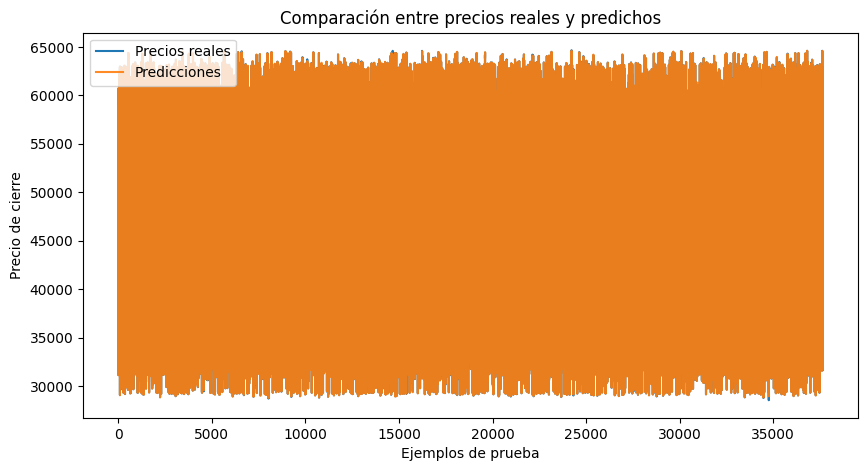

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
data = pd.read_csv("/content/main.csv")  # Archivo de los datos PREPARADOS
data.head()

# Paso 2: PREPROCESAMIENTO de los datos
# Convertir la columna de tiempo a un formato adecuado si es necesario
data['Open Time'] = pd.to_datetime(data['Open Time'], unit='ms')

# Seleccionar las características y la variable objetivo
features = data[['Open', 'High', 'Low', 'Volume', 'Quote asset volume', 'Number of trades',
                 'Taker buy base asset volume', 'Taker buy quote asset volume']]
target = data['Close']

# Paso 3: Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Paso 4: Inicializar y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Paso 5: Hacer predicciones
y_pred = model.predict(X_test)

# Paso 6: Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Error absoluto medio (MAE):", mae)
print("Raíz del error cuadrático medio (RMSE):", rmse)

# Paso 7: Visualizar el resultado de las predicciones
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Precios reales")
plt.plot(y_pred, label="Predicciones", alpha=0.9)
plt.legend()
plt.title("Comparación entre precios reales y predichos")
plt.xlabel("Ejemplos de prueba")
plt.ylabel("Precio de cierre")
plt.show()


In [ ]:
# Paso 8: Ejemplo de predicción con un nuevo dato
nuevo_dato = pd.DataFrame({
    'Open': [57450.89000000],
    'High': [57475.66000000],
    'Low': [57435.51000000],
    'Volume': [14.16831800],
    'Quote asset volume': [814059.35165094],
    'Number of trades': [730],
    'Taker buy base asset volume': [7.24775100],
    'Taker buy quote asset volume': [416412.02220631]
})

prediccion = model.predict(nuevo_dato)
print("Predicción para el precio de cierre:", prediccion[0])

Predicción para el precio de cierre: 57452.23460000005


## Evaluación del modelo y conclusiones

Los resultados obtenidos fueron bastante esperados, ya que se deduce que la IA logro comprender a través de los datos de entrenamiento que posibles datos futuros pueden llegar a trabajar según resultados anteriores, esto nos permite entender lo que realizara el precio en futuros posibles. Este modelo de IA tiene como se mencionó anteriormente sus diversas ventajas, las cuales se puede concluir las siguientes:
1. Adaptación a datos con múltiples factores.
2. Capacidad para predecir en condiciones volátiles.
3. Mejora en la estabilidad de predicciones.
4. Eficiencia en tiempos de entrenamiento.
5. Capacidad para identificar variables relevantes.
6. Flexibilidad para ajustarse a predicciones a corto plazo.

Ya para finalizar, se concluye que el modelo de IA de aprendizaje automático a través de algoritmos `Random Forest` permitió que este se adaptase a las diversas volatilidades entregadas en el conjunto de datos del precio de bitcoin en el lapso de tiempo e intervalo del enunciado.

# Referencias bibliográficas

IBM. (2023, May 3). random forest. Ibm.com. https://www.ibm.com/mx-es/topics/random-forest

‌Verma, A. (2021). Bitcoin Price (USD). Kaggle.com. https://www.kaggle.com/datasets/aakashverma8900/bitcoin-price-usd/data

‌RandomForest/fake_news_random_forest.py at main · Samu40/RandomForest. (2024). GitHub. https://github.com/Samu40/RandomForest/blob/main/fake_news_random_forest.py

‌